In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
MLR = pd.read_csv('MLR.csv')
MLR = MLR[['Mean Absolute Error']]
MLR = MLR.rename(columns={'Mean Absolute Error':'MLR MAE'})
MLR

,MLR MAE
0,14566.336549
1,15386.397379
2,15567.144063
3,15231.013721
4,13651.817796
5,14868.242055
6,14417.167304
7,15121.200286
8,15174.650346
9,14926.800769


In [3]:
Ridge = pd.read_csv('Ridge.csv')
Ridge = Ridge[['Mean Absolute Error']]
Ridge = Ridge.rename(columns={'Mean Absolute Error':'Ridge MAE'})
Ridge

,Ridge MAE
0,14275.946393
1,16071.635510
2,13720.816403
3,14100.564771
4,13968.989557
5,14875.924031
6,14471.384850
7,13537.174486
8,15679.317901
9,14484.198035


In [18]:
RA = pd.read_csv('Ridge(Alpha).csv')
RA = RA[['Mean Absolute Error']]
RA = RA.rename(columns={'Mean Absolute Error':'Ridge(Alpha) MAE'})
RA

,Ridge(Alpha) MAE
0,15078.772567
1,14345.458711
2,14695.338712
3,14986.772546
4,14536.179424
5,13915.267558
6,14282.651528
7,14772.696542
8,13592.513649
9,15427.520940


In [19]:
L = pd.read_csv('Lasso.csv')
L = L[['Mean Absolute Error']]
L = L.rename(columns={'Mean Absolute Error':'Lasso MAE'})
L

,Lasso MAE
0,14290.394307
1,15021.283537
2,14970.849868
3,14367.161476
4,14728.054729
5,15316.763194
6,15223.734466
7,14336.910651
8,14671.773085
9,15631.695492


In [4]:
LA = pd.read_csv('Lasso(Alpha).csv')
LA = LA[['Mean Absolute Error']]
LA = LA.rename(columns={'Mean Absolute Error':'Lasso(Alpha) MAE'})
LA

,Lasso(Alpha) MAE
0,13619.726035
1,13345.626010
2,14246.047564
3,14699.706369
4,13729.655424
5,13304.418777
6,13471.342475
7,14157.587039
8,14510.992963
9,13680.320331


In [5]:
EN = pd.read_csv('ElasticNet(Alpha=1).csv')
EN = EN[['Mean Absolute Error']]
EN = EN.rename(columns={'Mean Absolute Error':'ElasticNet(Alpha=1) MAE'})
EN

,ElasticNet(Alpha=1) MAE
0,16323.556393
1,16097.114538
2,15680.104092
3,15177.085797
4,14976.284308
5,15831.356081
6,16263.972328
7,14943.918453
8,14603.578529
9,15361.620646


In [6]:
RF_NO_BS = pd.read_csv('RF_No_BS.csv')
RF_NO_BS = RF_NO_BS[['Mean Absolute Error']]
RF_NO_BS = RF_NO_BS.rename(columns={'Mean Absolute Error':'RF (NO BS) MAE'})
RF_NO_BS

,RF (NO BS) MAE
0,24075.517070
1,21953.379023
2,19979.802202
3,22347.916357
4,23165.342667
5,22463.016481
6,21256.667457
7,23480.382388
8,22641.265271
9,22044.772915


In [7]:
RF_W_BS = pd.read_csv('RF_W_BS.csv')
RF_W_BS = RF_W_BS[['Mean Absolute Error']]
RF_W_BS = RF_W_BS.rename(columns={'Mean Absolute Error':'RF (W BS) MAE'})
RF_W_BS

,RF (W BS) MAE
0,16078.050760
1,16094.827783
2,14990.530062
3,14719.503364
4,15076.437504
5,15556.226558
6,14944.447411
7,14321.847953
8,15457.225488
9,17043.168884


In [8]:
GB = pd.read_csv('GB.csv')
GB = GB[['Mean Absolute Error']]
GB = GB.rename(columns={'Mean Absolute Error':'GB MAE'})
GB

,GB MAE
0,14838.022438
1,13748.175946
2,14027.289722
3,13762.972390
4,15610.647521
5,14362.620448
6,13332.393022
7,14077.425757
8,13981.324869
9,12695.462107


In [9]:
XGB = pd.read_csv('XGB.csv')
XGB = XGB[['Mean Absolute Error']]
XGB = XGB.rename(columns={'Mean Absolute Error':'XGB MAE'})
XGB

,XGB MAE
0,14845.209299
1,15650.608382
2,15103.535096
3,15208.075860
4,15207.931698
5,14861.980596
6,15351.530426
7,14763.904706
8,14188.052556
9,14148.036755


In [10]:
R_GB = pd.read_csv('R+GB.csv')
R_GB = R_GB[['Mean Absolute Error']]
R_GB = R_GB.rename(columns={'Mean Absolute Error':'R+GB MAE'})
R_GB

,R+GB MAE
0,11062.454461
1,11441.098834
2,11078.887612
3,11858.851473
4,10975.219060
5,12133.721850
6,11434.712231
7,11454.180913
8,12379.230767
9,12076.002004


In [12]:
R_XGB = pd.read_csv('R+XGB.csv')
R_XGB = R_XGB[['Mean Absolute Error']]
R_XGB = R_XGB.rename(columns={'Mean Absolute Error':'R+XGB MAE'})
R_XGB

,R+XGB MAE
0,13159.691449
1,11326.684757
2,11947.344234
3,12667.938554
4,11750.303313
5,12793.586352
6,12261.421917
7,12227.839305
8,11978.798589
9,12372.994901


In [13]:
L_GB = pd.read_csv('L+GB.csv')
L_GB = L_GB[['Mean Absolute Error']]
L_GB = L_GB.rename(columns={'Mean Absolute Error':'L+GB MAE'})
L_GB

,L+GB MAE
0,12526.062204
1,12585.148915
2,12393.561946
3,10941.822740
4,11619.601465
5,11837.777622
6,11505.360345
7,11889.643936
8,11843.788005
9,11569.988863


In [14]:
L_XGB = pd.read_csv('L+XGB.csv')
L_XGB = L_XGB[['Mean Absolute Error']]
L_XGB = L_XGB.rename(columns={'Mean Absolute Error':'L+XGB MAE'})
L_XGB

,L+XGB MAE
0,13314.160350
1,13049.897196
2,12438.410426
3,11816.805214
4,12770.958842
5,12805.390770
6,11418.230329
7,12385.629251
8,12298.931662
9,12025.900678


In [15]:
E_GB = pd.read_csv('E+GB.csv')
E_GB = E_GB[['Mean Absolute Error']]
E_GB = E_GB.rename(columns={'Mean Absolute Error':'E+GB MAE'})
E_GB

,E+GB MAE
0,12031.368639
1,11184.953489
2,12142.934401
3,13188.945460
4,12586.544934
5,13769.521261
6,11830.090112
7,11879.556102
8,12625.626388
9,12246.705898


In [16]:
E_XGB = pd.read_csv('E+XGB.csv')
E_XGB = E_XGB[['Mean Absolute Error']]
E_XGB = E_XGB.rename(columns={'Mean Absolute Error':'E+XGB MAE'})
E_XGB

,E+XGB MAE
0,13220.107104
1,12898.768072
2,11720.965867
3,12646.347868
4,12924.410241
5,13152.787785
6,12331.135931
7,11823.101248
8,12793.095809
9,12363.573952


In [23]:
MAE = pd.concat([MLR, Ridge, RA, L, LA, EN, 
                   RF_NO_BS, RF_W_BS, GB, XGB,
                   R_GB, R_XGB, L_GB, L_XGB, E_GB, E_XGB], axis=1)
MAE

,MLR MAE,Ridge MAE,Ridge(Alpha) MAE,Lasso MAE,Lasso(Alpha) MAE,ElasticNet(Alpha=1) MAE,RF (NO BS) MAE,RF (W BS) MAE,GB MAE,XGB MAE,R+GB MAE,R+XGB MAE,L+GB MAE,L+XGB MAE,E+GB MAE,E+XGB MAE
0,14566.336549,14275.946393,15078.772567,14290.394307,13619.726035,16323.556393,24075.517070,16078.050760,14838.022438,14845.209299,11062.454461,13159.691449,12526.062204,13314.160350,12031.368639,13220.107104
1,15386.397379,16071.635510,14345.458711,15021.283537,13345.626010,16097.114538,21953.379023,16094.827783,13748.175946,15650.608382,11441.098834,11326.684757,12585.148915,13049.897196,11184.953489,12898.768072
2,15567.144063,13720.816403,14695.338712,14970.849868,14246.047564,15680.104092,19979.802202,14990.530062,14027.289722,15103.535096,11078.887612,11947.344234,12393.561946,12438.410426,12142.934401,11720.965867
3,15231.013721,14100.564771,14986.772546,14367.161476,14699.706369,15177.085797,22347.916357,14719.503364,13762.972390,15208.075860,11858.851473,12667.938554,10941.822740,11816.805214,13188.945460,12646.347868
4,13651.817796,13968.989557,14536.179424,14728.054729,13729.655424,14976.284308,23165.342667,15076.437504,15610.647521,15207.931698,10975.219060,11750.303313,11619.601465,12770.958842,12586.544934,12924.410241
5,14868.242055,14875.924031,13915.267558,15316.763194,13304.418777,15831.356081,22463.016481,15556.226558,14362.620448,14861.980596,12133.721850,12793.586352,11837.777622,12805.390770,13769.521261,13152.787785
6,14417.167304,14471.384850,14282.651528,15223.734466,13471.342475,16263.972328,21256.667457,14944.447411,13332.393022,15351.530426,11434.712231,12261.421917,11505.360345,11418.230329,11830.090112,12331.135931
7,15121.200286,13537.174486,14772.696542,14336.910651,14157.587039,14943.918453,23480.382388,14321.847953,14077.425757,14763.904706,11454.180913,12227.839305,11889.643936,12385.629251,11879.556102,11823.101248
8,15174.650346,15679.317901,13592.513649,14671.773085,14510.992963,14603.578529,22641.265271,15457.225488,13981.324869,14188.052556,12379.230767,11978.798589,11843.788005,12298.931662,12625.626388,12793.095809
9,14926.800769,14484.198035,15427.520940,15631.695492,13680.320331,15361.620646,22044.772915,17043.168884,12695.462107,14148.036755,12076.002004,12372.994901,11569.988863,12025.900678,12246.705898,12363.573952


In [24]:
meds = MAE.median()
meds

MLR MAE                    14896.064510
Ridge MAE                  14446.958804
Ridge(Alpha) MAE           14736.219702
Lasso MAE                  14818.101017
Lasso(Alpha) MAE           14108.017295
ElasticNet(Alpha=1) MAE    15408.086961
RF (NO BS) MAE             22293.868395
RF (W BS) MAE              15080.478744
GB MAE                     14028.539599
XGB MAE                    14969.205973
R+GB MAE                   11808.618375
R+XGB MAE                  12122.665655
L+GB MAE                   11773.456909
L+XGB MAE                  12143.765737
E+GB MAE                   12253.693071
E+XGB MAE                  12563.174776
dtype: float64

In [28]:
meds.sort_values(ascending=True, inplace=True)
meds.index

Index(['L+GB MAE', 'R+GB MAE', 'R+XGB MAE', 'L+XGB MAE', 'E+GB MAE',
       'E+XGB MAE', 'GB MAE', 'Lasso(Alpha) MAE', 'Ridge MAE',
       'Ridge(Alpha) MAE', 'Lasso MAE', 'MLR MAE', 'XGB MAE', 'RF (W BS) MAE',
       'ElasticNet(Alpha=1) MAE', 'RF (NO BS) MAE'],
      dtype='object')

In [29]:
MAE = MAE[meds.index]

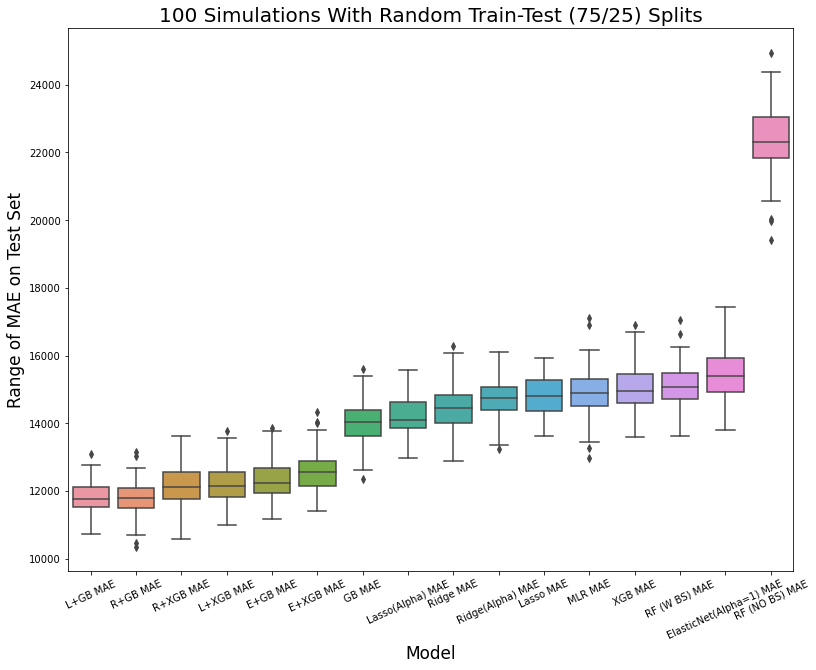

In [30]:
plt.figure(figsize=(13,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of MAE on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=MAE)
plt.xticks(rotation=25);